# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

In [2]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

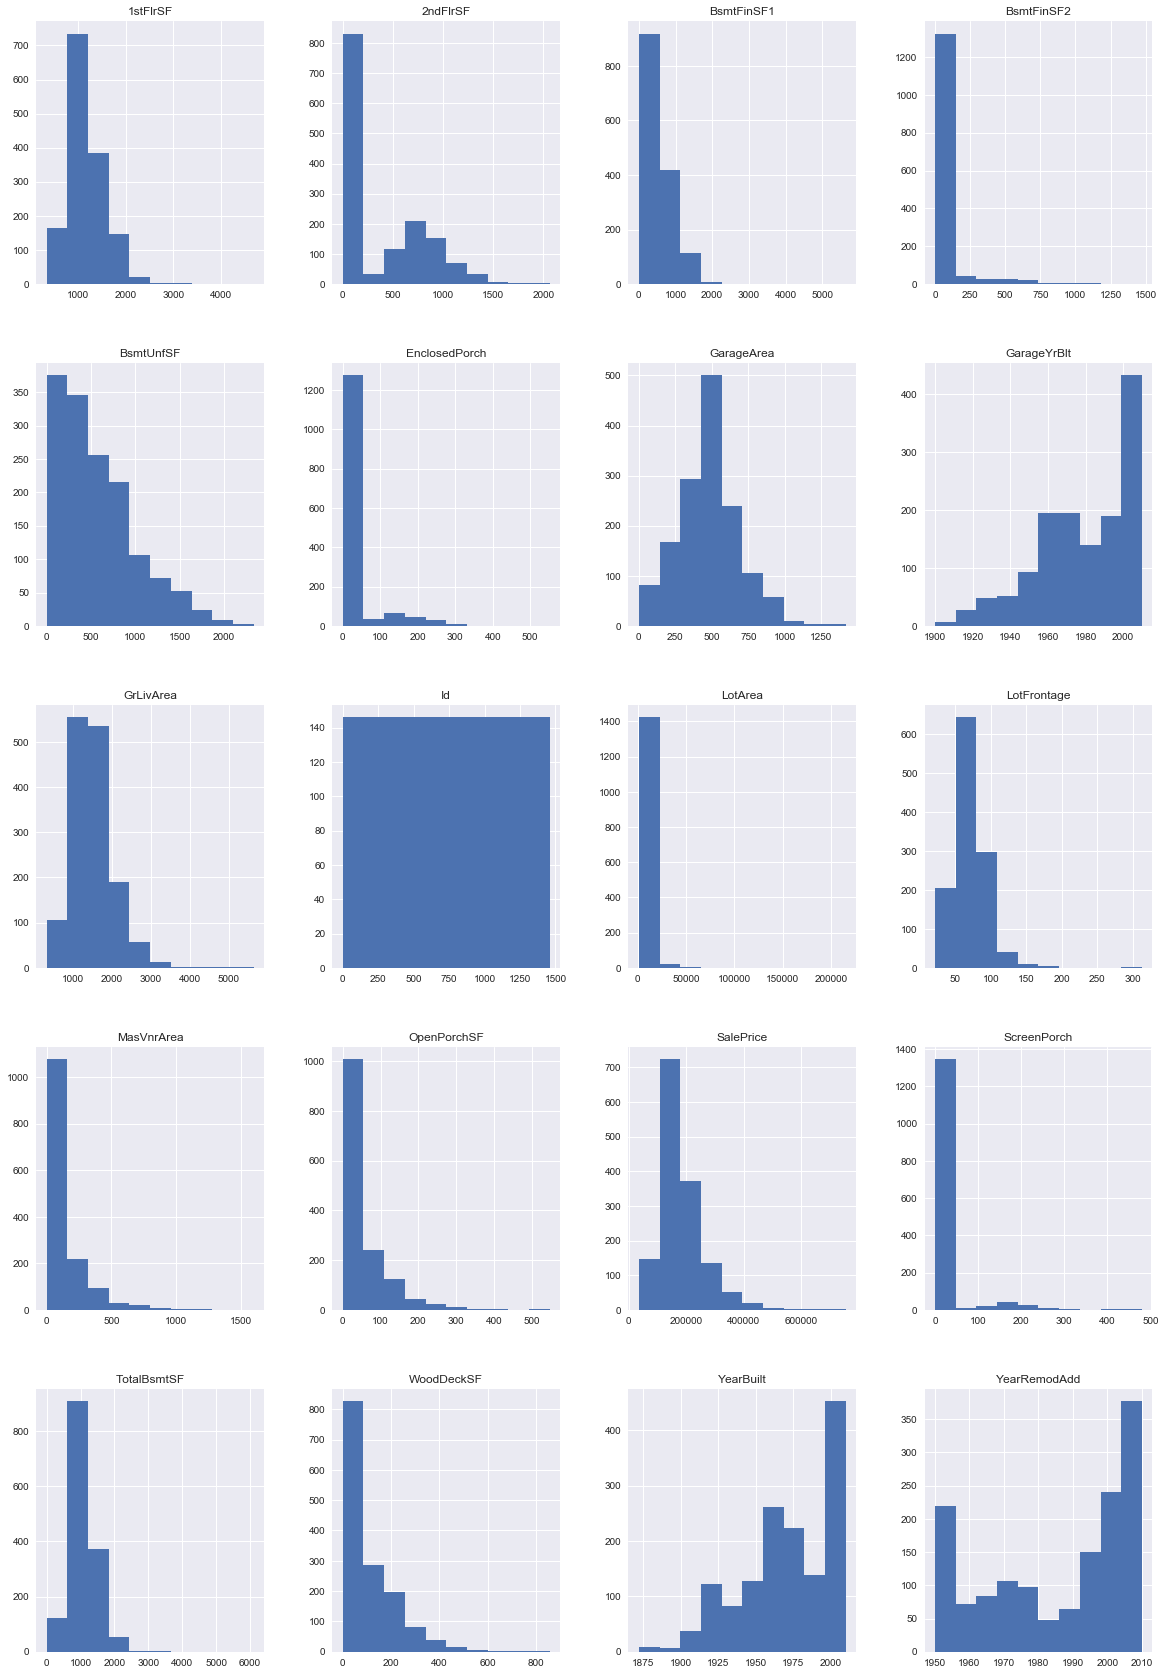

In [13]:
cat_data = ames.loc[:, ((ames.dtypes != 'object') & (ames.nunique() > 30))]
cat_data.hist(figsize=(20,30));

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [15]:
cat_data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000


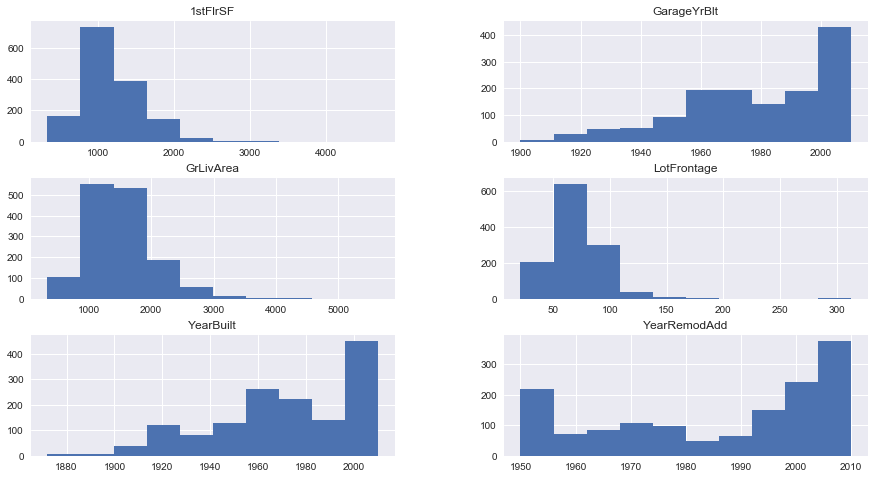

In [18]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = cat_data[['1stFlrSF', 'GarageYrBlt', 'GrLivArea', 'LotFrontage', 'YearBuilt', 'YearRemodAdd']]
ames_cont.hist(figsize=(15,8));


## Perform log transformations for the variables where it makes sense

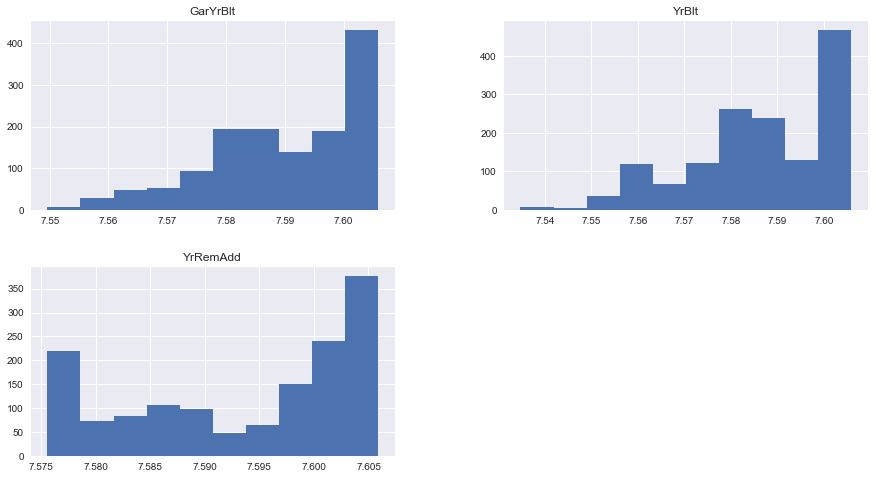

In [23]:
# Your code here
import numpy as np

data_log = pd.DataFrame([])
data_log['GarYrBlt'] = np.log(cat_data['GarageYrBlt'])
data_log['YrBlt'] = np.log(cat_data['YearBuilt'])
data_log['YrRemAdd'] = np.log(cat_data['YearRemodAdd'])
data_log.hist(figsize=(15,8));

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

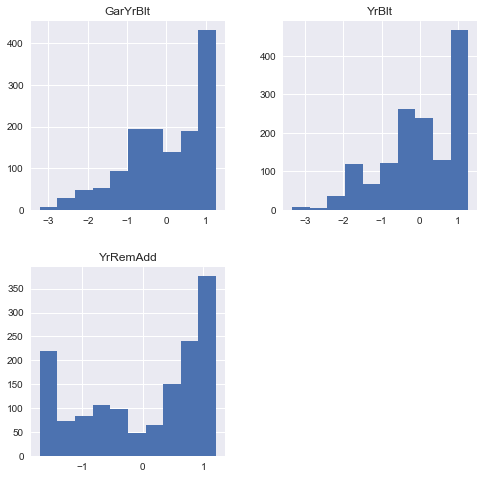

In [24]:
# Your code heredef normalize(feature):
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!